# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [243]:
print("Чтобы результат повторялся")

Чтобы результат повторялся


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [320]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [246]:
df_train.sample(n=10, random_state = 42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [247]:
pd.concat([df_test.iloc[:5], df_test.iloc[-5:]])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [248]:
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [249]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [250]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [251]:
cols = df_train.columns.difference(['selling_price'])
cols

Index(['engine', 'fuel', 'km_driven', 'max_power', 'mileage', 'name', 'owner',
       'seats', 'seller_type', 'torque', 'transmission', 'year'],
      dtype='object')

In [252]:
df_train[cols].duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [253]:
df_train[df_train[cols].duplicated()].drop_duplicates().shape

(657, 13)

In [254]:
df_train[df_train[cols].duplicated()].shape

(1159, 13)

In [255]:
df_train[df_train[df_train.columns.difference(['seats'])].duplicated()][(df_train['selling_price']== 450000) & (df_train['km_driven']== 56290)].head(1)

C:\Users\Matvey\AppData\Local\Temp\ipykernel_37308\2487404304.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train[df_train.columns.difference(['seats'])].duplicated()][(df_train['selling_price']== 450000) & (df_train['km_driven']== 56290)].head(1)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
369,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [256]:
df_train = df_train.drop_duplicates(subset=cols)

In [257]:
df_train.shape

(5840, 13)

In [258]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [259]:
df_train.reset_index(drop = True, inplace = True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [260]:
def f(x):
    try:
        res = float(str(x).split(' ')[0])
    except ValueError:
        res = None 
    return res
columns_to_fill = ['mileage', 'engine', 'max_power', 'seats']


In [261]:
df_train= df_train.drop(columns=['torque'])
df_train.loc[:, 'mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split(' ')[0]))
df_train.loc[:, 'engine'] = df_train['engine'].apply(lambda x: float(str(x).split(' ')[0]))
df_train.loc[:, 'max_power'] = df_train['max_power'].apply(f)
df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].median())

In [262]:
df_test= df_test.drop(columns=['torque'])
df_test.loc[:, 'mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split(' ')[0]))
df_test.loc[:, 'engine'] = df_test['engine'].apply(lambda x: float(str(x).split(' ')[0]))
df_test.loc[:, 'max_power'] = df_test['max_power'].apply(f)
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_train[columns_to_fill].median())

In [263]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()


(0, 0)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.




(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [264]:
df_train['seats'] = df_train['seats'].astype('int')
df_train['engine'] = df_train['engine'].astype('int')

In [265]:
print("Потому что количество сидений не пропорционально цене авто")

Потому что количество сидений не пропорционально цене авто


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

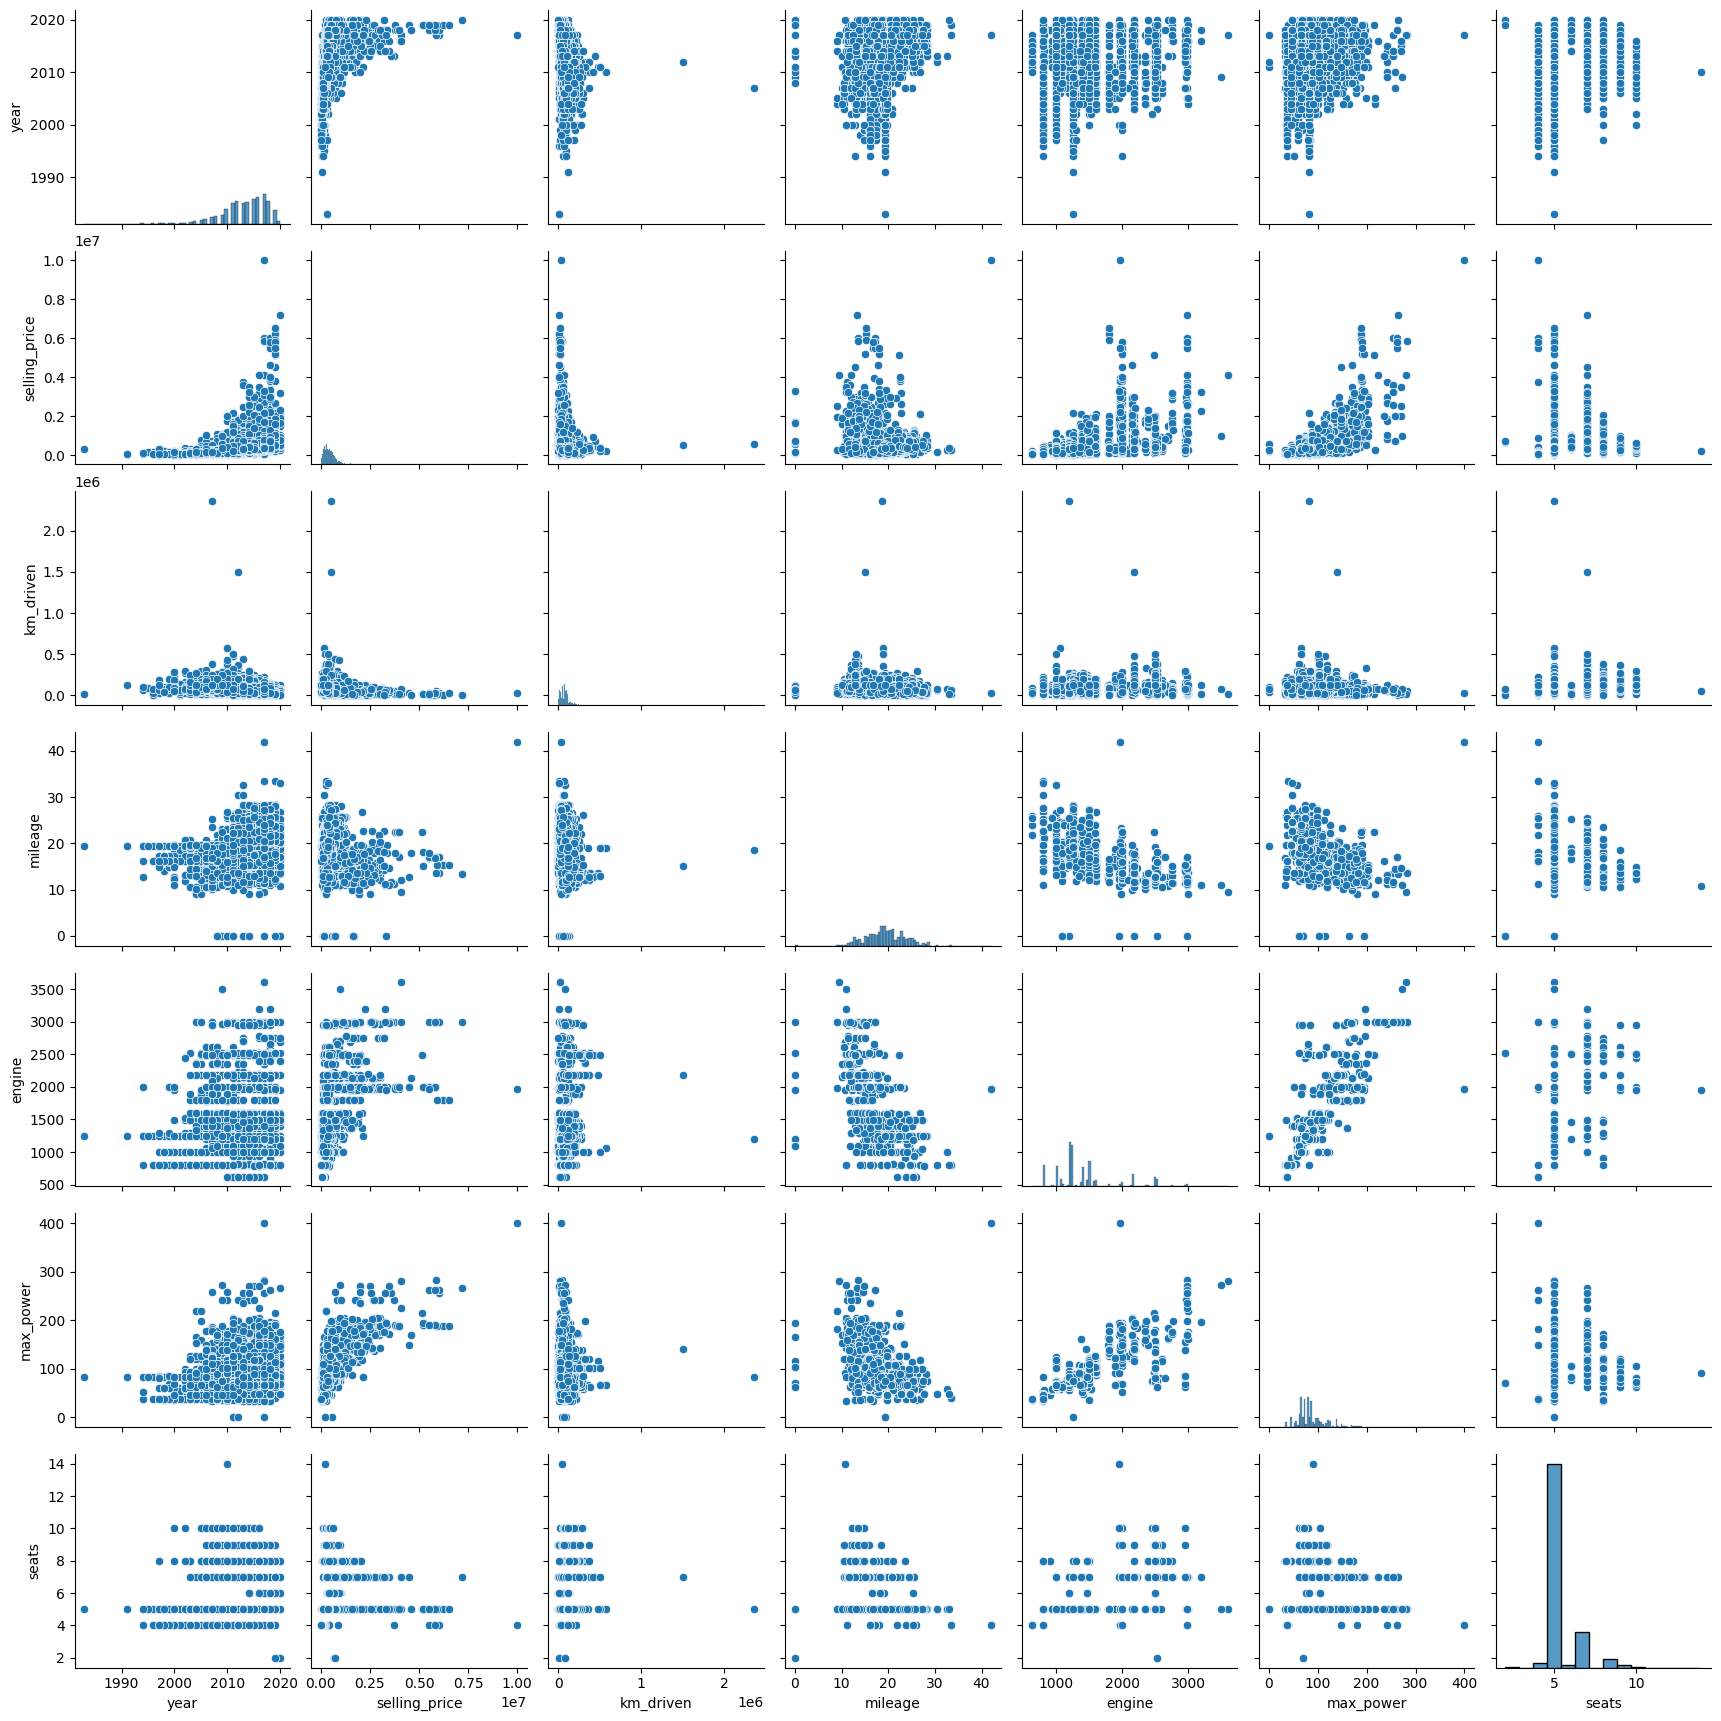

In [215]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [216]:
print('selling_price ростет с ростом max_power')
print('selling_price падает с ростом km_driven')
print('selling_price у старых авто низкая')


print('есть зависимость, схожая с линейной, между max_power и engine  ')

selling_price ростет с ростом max_power
selling_price падает с ростом km_driven
selling_price у старых авто низкая
есть зависимость, схожая с линейной, между max_power и engine  


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

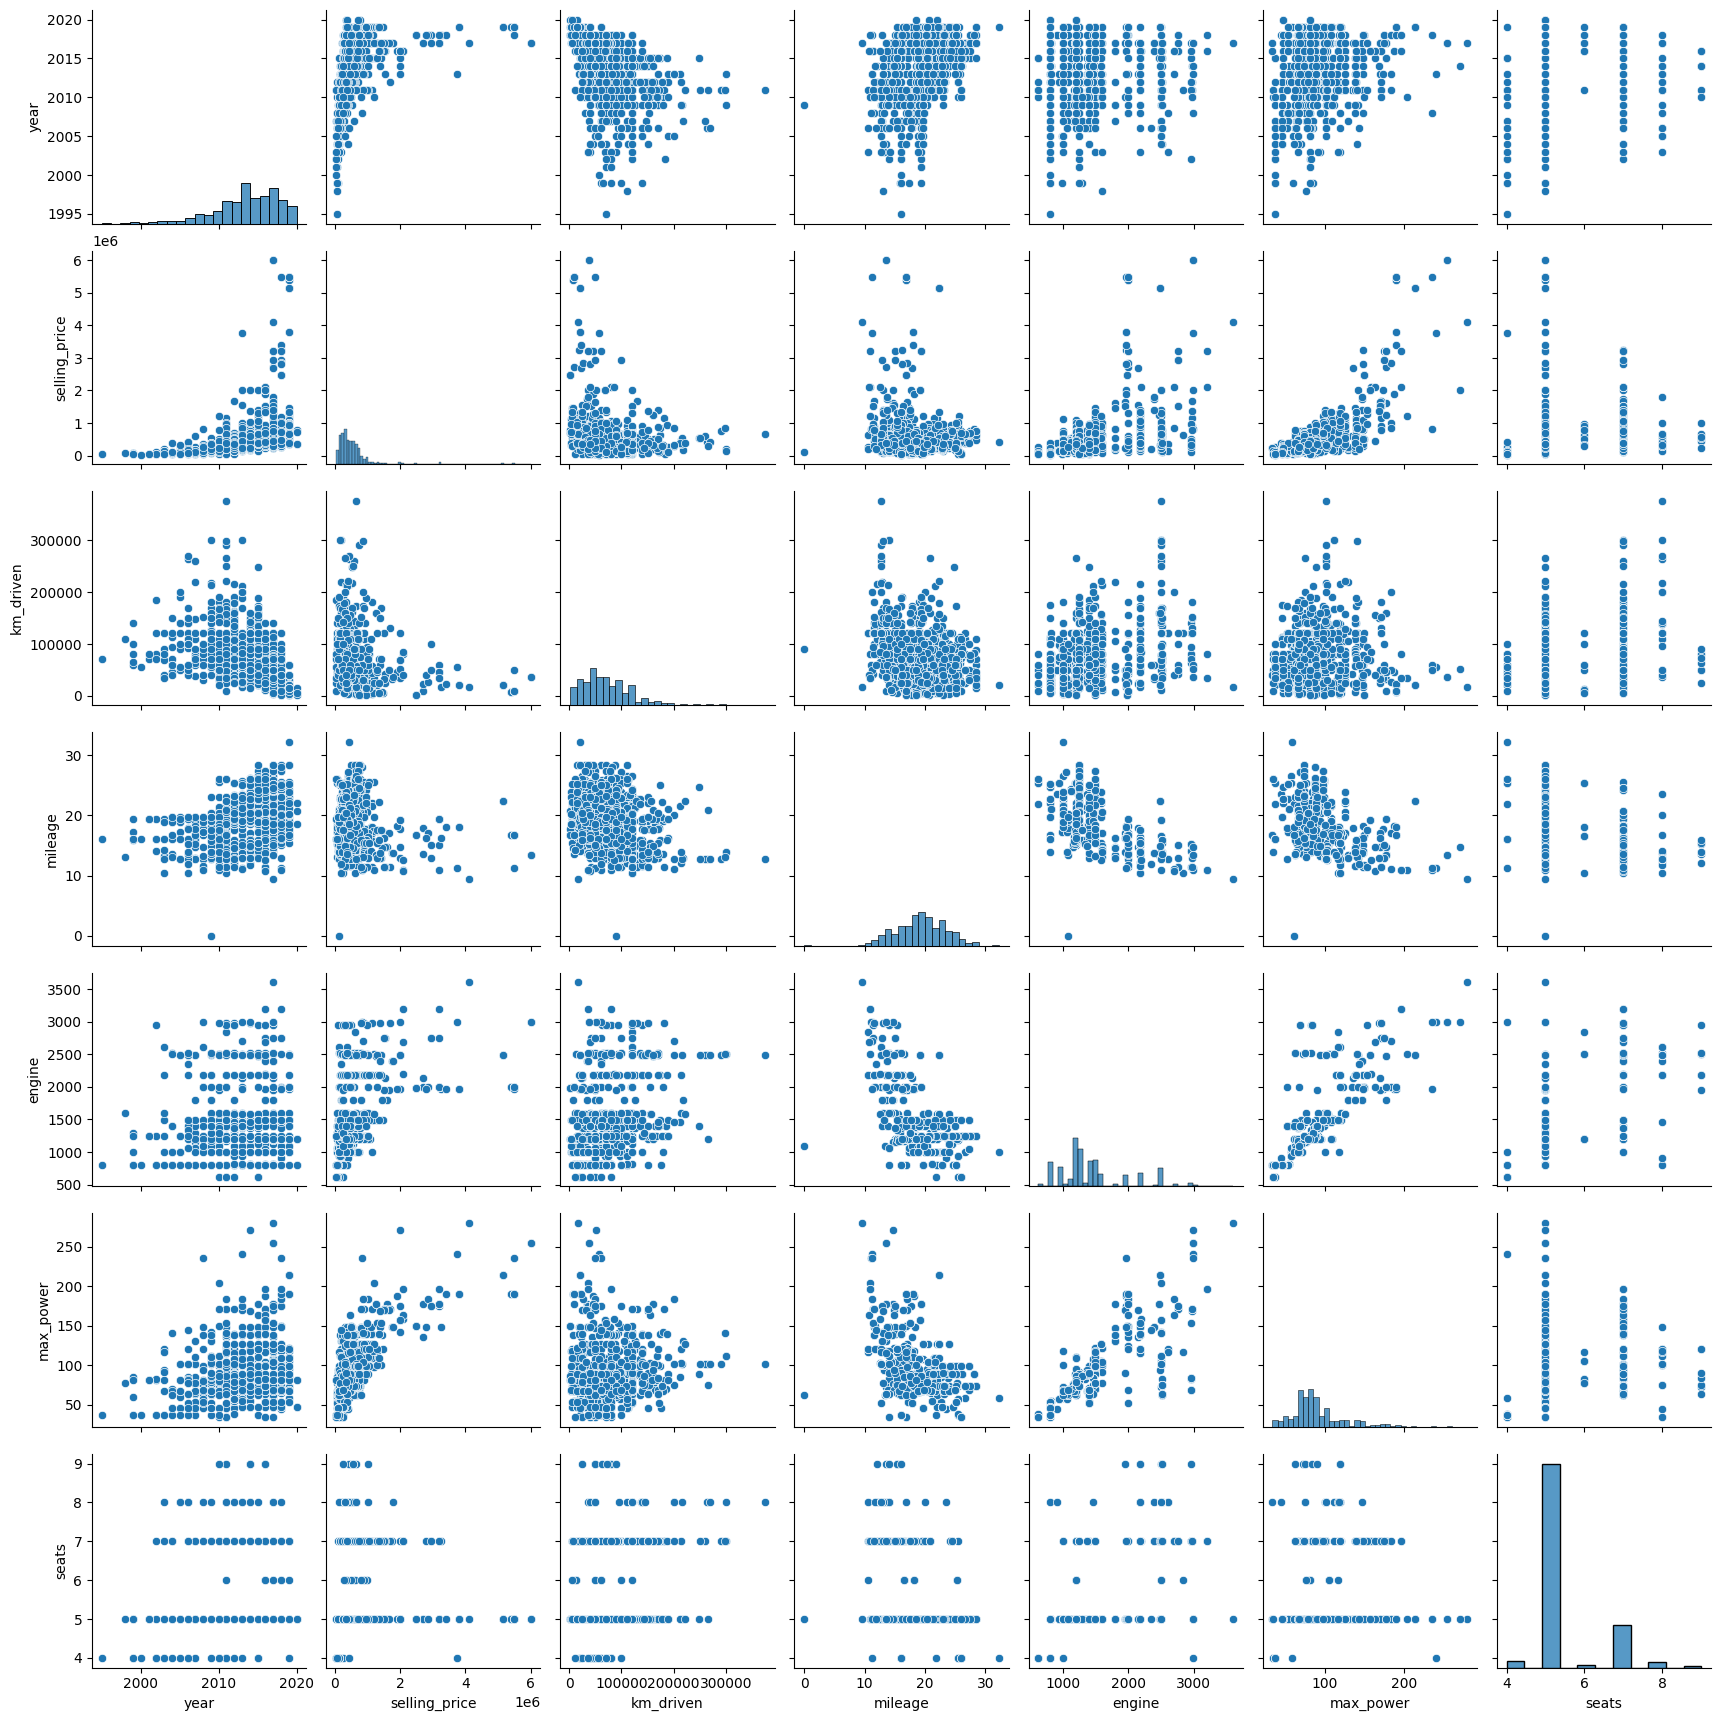

In [217]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [218]:
cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

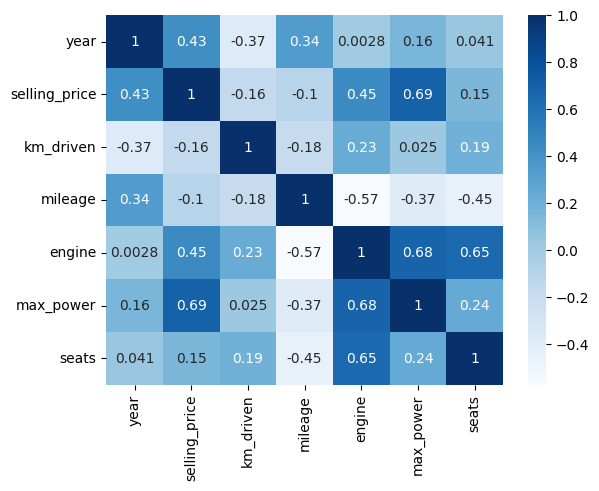

In [219]:
cor = df_train[cols].corr()
sns.heatmap(cor, cmap="Blues", annot=True);

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [220]:
print('selling_price и max_power')
print('engine и max_power, engine и seats, max_power и selling_price')
print('нет, тк 0.43 - довольно слабая коррреляция')

selling_price и max_power
engine и max_power, engine и seats, max_power и selling_price
нет, тк 0.43 - довольно слабая коррреляция


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

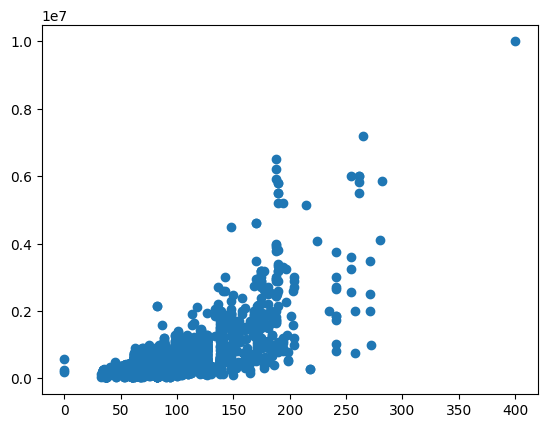

In [221]:
plt.scatter(df_train['max_power'], df_train['selling_price'])


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [266]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns= ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'])

In [267]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns= ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price'])

In [268]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5840, 6), (5840,), (1000, 6), (1000,))

In [269]:
assert X_train.shape == (5840, 6)

In [270]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [271]:
list(cols[:-1])

['engine',
 'fuel',
 'km_driven',
 'max_power',
 'mileage',
 'name',
 'owner',
 'seats',
 'seller_type',
 'torque',
 'transmission']

In [272]:
cols = X_train.columns

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

alg = LinearRegression()
alg.fit(X_train, y_train)
r2_train = r2_score(y_train, alg.predict(X_train))
r2_test = r2_score(y_test, alg.predict(X_test))
mse_train = MSE(y_train, alg.predict(X_train))
mse_test = MSE(y_test, alg.predict(X_test))
r2_train, r2_test, mse_train, mse_test

(0.5922591702157309, 0.594141979478839, 116874153930.02876, 233298779730.45712)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [274]:
import pickle
from sklearn.preprocessing import StandardScaler
def fit_and_save_scaler(data, columns):
    scaler = StandardScaler()
    scaler.fit(data[columns])
    print(scaler.get_params())
    print(scaler.var_)
    with open('standard_scaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)
    with open('columns_scale.pkl', 'wb') as columns_file:
        pickle.dump(columns, columns_file)
    return True
def open_and_scale(data):
    with open('standard_scaler.pkl', 'rb') as scaler_file:
        loaded_scaler = pickle.load(scaler_file)
    with open('columns_scale.pkl', 'rb') as columns_file:
        loaded_columns = pickle.load(columns_file)
    data[loaded_columns] = pd.DataFrame(loaded_scaler.transform(data[loaded_columns]), columns=loaded_columns)
    return data

In [275]:
scaler = fit_and_save_scaler(X_train, list(cols[:-1]))

{'copy': True, 'with_mean': True, 'with_std': True}
[1.67712468e+01 3.60792354e+09 1.58852615e+01 2.35827999e+05
 1.00094465e+03]


In [276]:
X_train = open_and_scale(X_train)
X_test = open_and_scale(X_test)

In [277]:
alg = LinearRegression()
alg.fit(X_train, y_train)
r2_train = r2_score(y_train, alg.predict(X_train))
r2_test = r2_score(y_test, alg.predict(X_test))
mse_train = MSE(y_train, alg.predict(X_train))
mse_test = MSE(y_test, alg.predict(X_test))
r2_train, r2_test, mse_train, mse_test

(0.5922591702157305, 0.5941419794788516, 116874153930.0289, 233298779730.4498)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [278]:
cols[np.argmax(alg.coef_)]

'max_power'

In [279]:
alg.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23628.30230834])

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [280]:
from sklearn.linear_model import Lasso

alg = Lasso()
alg.fit(X_train, y_train)
r2_train = r2_score(y_train, alg.predict(X_train))
r2_test = r2_score(y_test, alg.predict(X_test))
mse_train = MSE(y_train, alg.predict(X_train))
mse_test = MSE(y_test, alg.predict(X_test))
r2_train, r2_test, mse_train, mse_test

(0.5922591701800806,
 0.5941408079804495,
 116874153940.24751,
 233299453141.18427)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [281]:
alg.coef_

array([152772.38289482, -44157.69183833,  28832.05103806,  61173.63132524,
       322808.25271754, -23625.33421138])

In [150]:
print('Возможно потому что минимум функции потель лежит внутри многомерного ромба')

Возможно потому что минимум функции потель лежит внутри многомерного ромба


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [283]:
from sklearn.model_selection import GridSearchCV


lasso = Lasso()
param_grid = {'alpha': np.linspace(1000, 100000, 100)}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([  1000.,   2000.,   3000.,   4000.,   5000.,   6000.,   7000.,
         8000.,   9000.,  10000.,  11000.,  12000.,  13000.,  14000.,
        15000.,  16000.,  17000.,  18000.,  19000.,  20000.,  21000.,
        22000.,  23000.,  24000.,  25000.,  26000.,  27000.,  28000.,
        29000.,  30000.,  31000.,  32000.,  33000.,  34000.,  35000.,
        36000.,  37000.,  38000.,  39000.,  40000.,  41000.,  42000.,
        4...
        50000.,  51000.,  52000.,  53000.,  54000.,  55000.,  56000.,
        57000.,  58000.,  59000.,  60000.,  61000.,  62000.,  63000.,
        64000.,  65000.,  66000.,  67000.,  68000.,  69000.,  70000.,
        71000.,  72000.,  73000.,  74000.,  75000.,  76000.,  77000.,
        78000.,  79000.,  80000.,  81000.,  82000.,  83000.,  84000.,
        85000.,  86000.,  87000.,  88000.,  89000.,  90000.,  91000.,
        92000.,  93000.,  94000.,  95000.,  96000.,  97000.,  98000.,
        99000., 100000.])})

In [284]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [285]:
best_params, best_model

({'alpha': 27000.0}, Lasso(alpha=27000.0))

In [286]:
best_model.fit(X_train, y_train)
r2_train = r2_score(y_train, best_model.predict(X_train))
r2_test = r2_score(y_test, best_model.predict(X_test))
mse_train = MSE(y_train, best_model.predict(X_train))
mse_test = MSE(y_test, best_model.predict(X_test))
r2_train, r2_test, mse_train, mse_test

(0.5824131089016262,
 0.5640821765916946,
 119696412584.47359,
 250578012806.85062)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [288]:
time = grid_search.cv_results_['mean_fit_time'].sum()*10
print(f'время обучения grid_seach {time}')
print(f'лучший коэффициент регуляризации {best_params}')
total_models = len(grid_search.cv_results_['params'])
print("Total number of models trained:", total_models)

zero_indices = np.where(best_model.coef_ == 0)[0]
print("занулены:", list(cols[zero_indices]))


время обучения grid_seach 2.3505623340606685
лучший коэффициент регуляризации {'alpha': 27000.0}
Total number of models trained: 100
занулены: ['mileage', 'engine', 'seats']


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [289]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
param_grid = {
    'alpha': np.linspace(1000, 100000, 100),
    'l1_ratio': np.linspace(0.1, 2, 20),
    'fit_intercept': [True, False],
    'max_iter': [10, 25, 35, 50, 100, 500, 1000]
}

grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

C:\Users\Matvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.317e+13, tolerance: 1.247e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+14, tolerance: 1.564e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matvey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\l

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([  1000.,   2000.,   3000.,   4000.,   5000.,   6000.,   7000.,
         8000.,   9000.,  10000.,  11000.,  12000.,  13000.,  14000.,
        15000.,  16000.,  17000.,  18000.,  19000.,  20000.,  21000.,
        22000.,  23000.,  24000.,  25000.,  26000.,  27000.,  28000.,
        29000.,  30000.,  31000.,  32000.,  33000.,  34000.,  35000.,
        36000.,  37000.,  38000.,  39000.,  40000.,  41000.,  420...
        71000.,  72000.,  73000.,  74000.,  75000.,  76000.,  77000.,
        78000.,  79000.,  80000.,  81000.,  82000.,  83000.,  84000.,
        85000.,  86000.,  87000.,  88000.,  89000.,  90000.,  91000.,
        92000.,  93000.,  94000.,  95000.,  96000.,  97000.,  98000.,
        99000., 100000.]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'max_iter': [10, 25, 35, 50, 100, 500, 1000]})

In [290]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [291]:
best_params, best_model

({'alpha': 27000.0,
  'fit_intercept': True,
  'l1_ratio': 0.9999999999999999,
  'max_iter': 25},
 ElasticNet(alpha=27000.0, l1_ratio=0.9999999999999999, max_iter=25))

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [292]:
y_train_cat = df_train['selling_price']
X_train_cat = df_train.drop(columns= ['name', 'selling_price'])
y_test_cat = df_test['selling_price']
X_test_cat = df_test.drop(columns= ['name', 'selling_price'])

In [294]:
X_train_cat = open_and_scale(X_train_cat)
X_test_cat = open_and_scale(X_test_cat)

In [296]:
assert X_train_cat.shape == (5840, 10)

In [297]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [298]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas


In [299]:
columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

def fit_and_save_encoder(data, columns):
    ohe = OneHotEncoder(drop='first')
    ohe.fit(data[columns])

    with open('one_hot_encoder.pkl', 'wb') as ohe_file:
        pickle.dump(ohe, ohe_file)
    with open('columns_encode.pkl', 'wb') as columns_file:
        pickle.dump(columns, columns_file)
    return True
def open_and_encode(data):
    with open('one_hot_encoder.pkl', 'rb') as ohe_file:
        loaded_ohe = pickle.load(ohe_file)
    with open('columns_encode.pkl', 'rb') as columns_file:
        loaded_columns = pickle.load(columns_file)
    data_encoded = pd.DataFrame(loaded_ohe.transform(data[loaded_columns]).toarray(), columns=encoder.get_feature_names_out(loaded_columns))
    result_df = pd.concat([data, data_encoded], axis=1)
    data = result_df.drop(columns=loaded_columns)
    return data

In [300]:
fit_and_save_encoder(X_train_cat, columns)

True

In [301]:
X_train_cat = open_and_encode(X_train_cat)
X_test_cat = open_and_encode(X_test_cat)

In [390]:
df_encoded = pd.DataFrame(encoder.transform(df_to_encode).toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
result_df = pd.concat([X_train_cat, df_encoded], axis=1)
X_train_cat = result_df.drop(columns=columns_to_encode)

df_encoded = pd.DataFrame(encoder.transform(X_test_cat[columns_to_encode]).toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
result_df = pd.concat([X_test_cat, df_encoded], axis=1)
X_test_cat = result_df.drop(columns=columns_to_encode)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [308]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer


ridge = Ridge()

param_grid = {'alpha': np.logspace(-6, 6, 13)}
r2_scorer = make_scorer(r2_score)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring=r2_scorer)

grid_search.fit(X_train_cat, y_train_cat)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             scoring=make_scorer(r2_score))

In [309]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [310]:
best_model

Ridge(alpha=10.0)

In [311]:
def save_model(model):
    with open('best_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    return True


In [304]:
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

In [306]:
grid_search.best_params_


{'alpha': 10.0}

In [305]:
best_alpha, best_score

(10.0, 0.6220694732316957)

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [417]:
pred = {'A': [110,105,120,90,80]}
true = {'A': [100,100,100,100,100]}
pred = pd.DataFrame(pred)
true = pd.DataFrame(true)
pred = pred['A']
true = true['A']

In [427]:
condition = ((pred/true)-1 <= 0.1) & ((pred/true)-1 >= -0.1)

In [429]:
condition


0    False
1     True
2    False
3     True
4    False
Name: A, dtype: bool

In [ ]:
def business_metrics(y_true, y_pred):
    condition = ((y_pred/y_true)-1 <= 0.1) & ((y_pred/y_true)-1 >= -0.1)
    return condition.sum()/ condition.shape[0]
business_metrics()

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from pydantic import BaseModel
from typing import List
import numpy as np
import pandas as pd
import json
from preprocessing import preproces, fitted_model
import csv
from fastapi.responses import StreamingResponse
from io import StringIO



from models import Item, Items,Event, Item_predicted, Items_predicted

app = FastAPI()

# data = np.array([[6.1, 2.8, 4.7, 1.2]])
# print(data)
# print(loaded_model.predict(data))

input_json = """
    {"name": "bmw",
    "year": 2010,
    "km_driven": 10000,
    "fuel": "Petrol",
    "seller_type": "Individual",
    "transmission": "Manual",
    "owner": "First Owner",
    "mileage": "23.01 kmpl",
    "engine": "999 CC",
    "max_power": "67 bhp",
    "torque": "91Nm@ 4250rpm",
    "seats": 5.0
}
"""
# print(Item.model_validate_json(input_json))

@app.post("/predict_item/")
def predict_item(item: Item) -> float:
    d = item.model_dump()
    # # data = json.loads(item)
    df = pd.DataFrame([d])
    df = preproces(df)
    print(df)
    model = fitted_model()
    predict = model.predict(df)
    print(predict)
    # df = pd.DataFrame({'A': [1,2,3]})
    # print(f'df: {df}')
    # return loaded_model.predict()
    return int(predict)
    return StreamingResponse(StringIO(csv_content), media_type="text/csv", headers={"Content-Disposition": "attachment;filename=result.csv"})


@app.post("/predict_items")
def upload(file: UploadFile = File(...)) :#-> List[dict]
    df = pd.read_csv(file.file)
    df_preprocessed = preproces(df)
    print(df_preprocessed)

    print(df)
    model = fitted_model()
    predict = model.predict(df_preprocessed)
    df['price_predicted'] = predict
    
    d1 = []
    for index, row in df.iterrows():
        row_dict = row.to_dict() 
        d1.append(row_dict)

    json_d1 = json.dumps(d1)

    print(json_d1)


    items_list = [Item.parse_obj(item) for item in d1]

    return items_list

#### Скрины (Работает корректно)

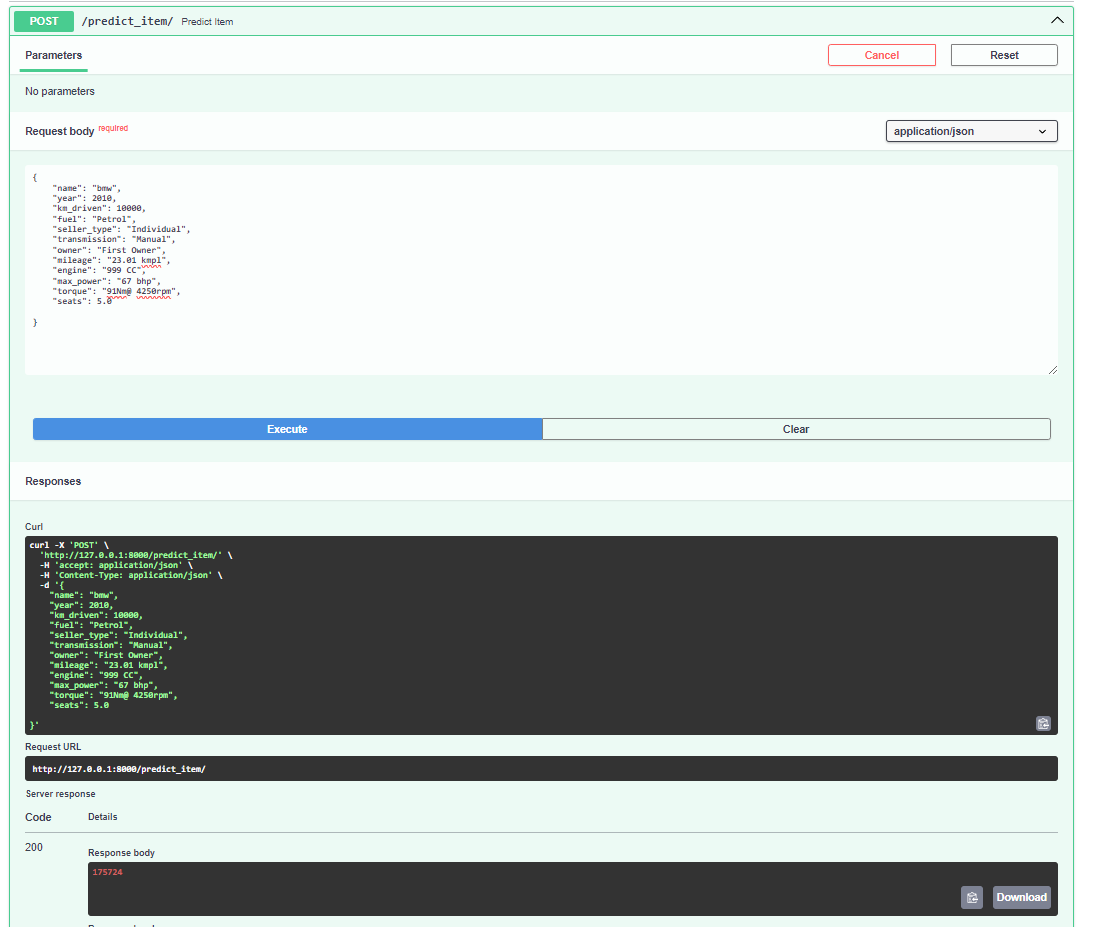

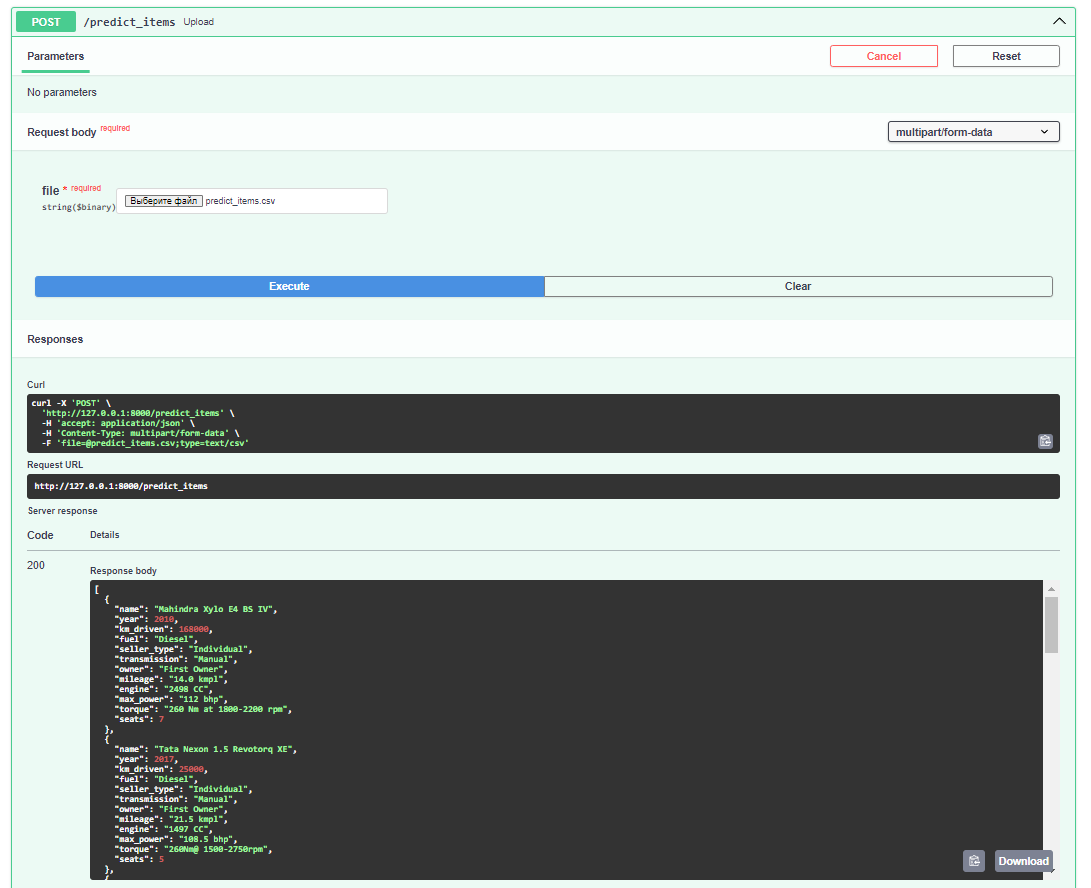

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link